In [214]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


## Import Libraries

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras import layers,Sequential
from keras.layers import SimpleRNN,LSTM,Dense,Dropout
from keras.metrics import mean_squared_error,R2Score

### Exploratory Data Analysis

In [216]:
df=pd.read_csv('/kaggle/input/netflix-stock-price-prediction/NFLX.csv')

In [217]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [218]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [219]:
df.shape

(1009, 7)

In [220]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [222]:
## checking for missing vaules
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [223]:
## checking for duplicate record
df.duplicated().sum()

0

<Axes: >

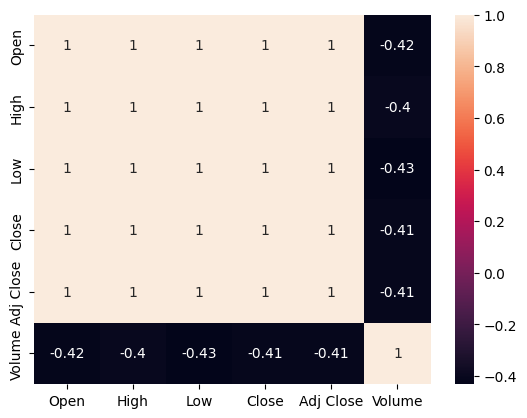

In [224]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

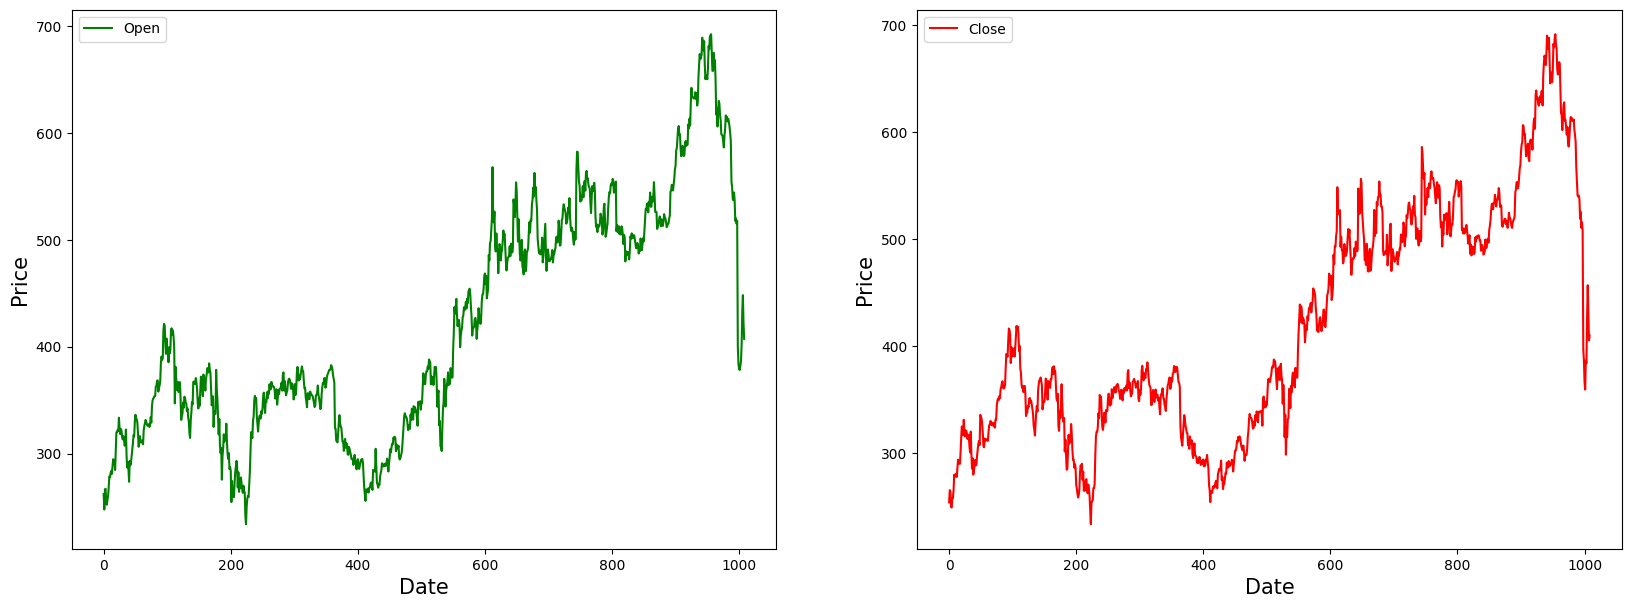

In [225]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

<div class="alert alert-block alert-warning" style="border: 3px solid #f0ad4e; background-color: #fcf8e3; padding: 10px;">
<p>
    <font color = black><b>Observations :</b></font>
</p>
<font color = black>
1.The heatmap plot provides a visual representation of the correlation between different features in the dataset.There is a strong correlation between the features [Open,Close,high,Low,Adj Close]because all the representing the Stock Price for the Day/Date.

2.There is no missing values or duplicate records in the dataset.
</font>
</div>



<div class="alert alert-block alert-success" style="border: 3px solid #f0ad4e; background-color: #	#355E3B; padding: 10px;">
<font color = black><b>Feature Selection:</b></font>
<font color = black>
    I'm Going to make use of only <b>"Open"</b> column because im trying to predict the opening price of the next day of market(whether the price is up or down)
</font>
</div>

In [226]:
# Feature Selection
data=df[['Date','Open']]
data.head()

,Date,Open
0,2018-02-05,262.000000
1,2018-02-06,247.699997
2,2018-02-07,266.579987
3,2018-02-08,267.079987
4,2018-02-09,253.850006


In [227]:
## Converting the Date column to Datetime Dtype.
data['Date']=pd.to_datetime(data['Date'])

In [228]:
data.set_index('Date',inplace=True)

In [229]:
data.head()

,Open
Date,
2018-02-05,262.000000
2018-02-06,247.699997
2018-02-07,266.579987
2018-02-08,267.079987
2018-02-09,253.850006


### Feature Transformation

In [230]:
scaler=MinMaxScaler()

In [231]:
scaled_data=data.copy()
scaled_data[data.columns]=scaler.fit_transform(data)

In [232]:
scaled_data

,Open
Date,
2018-02-05,0.061253
2018-02-06,0.030059
2018-02-07,0.071243
2018-02-08,0.072334
2018-02-09,0.043474
...,...
2022-01-31,0.366577
2022-02-01,0.434178
2022-02-02,0.467531


### Splitting the Dataset 

In [233]:
## splitting the dataset into 80% and 20%
training_size=int(len(scaled_data)*0.80)

train_data,test_data=scaled_data.iloc[:training_size,:],scaled_data.iloc[training_size:,:]
print("Length of Training data",train_data.shape)
print("Length of Testing data",test_data.shape)

Length of Training data (807, 1)
Length of Testing data (202, 1)


In [234]:
train_data.tail()

,Open
Date,
2021-04-14,0.700107
2021-04-15,0.676766
2021-04-16,0.690662
2021-04-19,0.682722
2021-04-20,0.699125


In [235]:
test_data.head()

,Open
Date,
2021-04-21,0.597867
2021-04-22,0.610562
2021-04-23,0.600070
2021-04-26,0.595162
2021-04-27,0.607945


In [236]:
#creating the sequence of features and labels for training the model
def create_data(dataset,n=1):
    features=[]
    targets=[]
    start_idx=0
    for stop_idx in range(n,len(dataset)):
        features.append(dataset.iloc[start_idx:stop_idx])
        targets.append(dataset.iloc[stop_idx])
        start_idx +=1
    return (np.array(features),np.array(targets))
    

In [237]:
X_train,y_train=create_data(train_data)
X_test,y_test=create_data(test_data)

In [238]:
print("Shape of X_train and y_train",X_train.shape,y_train.shape)
print("Shape of X_test and y_test",X_test.shape,y_test.shape)

Shape of X_train and y_train (806, 1, 1) (806, 1)
Shape of X_test and y_test (201, 1, 1) (201, 1)


## Model Training

### SIMPLE RNN

In [239]:
rnn=Sequential()
rnn.add(SimpleRNN(units=50,activation='relu',return_sequences=True,
                  input_shape=(X_train.shape[1],X_train.shape[2])))
rnn.add(Dropout(0.1))
rnn.add(SimpleRNN(units=50,activation='relu'))
rnn.add(Dense(units=1))
rnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 1, 50)             2600      
                                                                 
 dropout_8 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7701 (30.08 KB)
Trainable params: 7701 (30.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [240]:
rnn.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [241]:
rnn.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),verbose=2)

Epoch 1/100
26/26 - 3s - loss: 0.0573 - mean_absolute_error: 0.1758 - val_loss: 0.0175 - val_mean_absolute_error: 0.1181 - 3s/epoch - 109ms/step
Epoch 2/100
26/26 - 0s - loss: 0.0074 - mean_absolute_error: 0.0744 - val_loss: 0.0185 - val_mean_absolute_error: 0.1253 - 175ms/epoch - 7ms/step
Epoch 3/100
26/26 - 0s - loss: 0.0036 - mean_absolute_error: 0.0482 - val_loss: 0.0056 - val_mean_absolute_error: 0.0671 - 174ms/epoch - 7ms/step
Epoch 4/100
26/26 - 0s - loss: 0.0020 - mean_absolute_error: 0.0338 - val_loss: 0.0018 - val_mean_absolute_error: 0.0344 - 183ms/epoch - 7ms/step
Epoch 5/100
26/26 - 0s - loss: 0.0013 - mean_absolute_error: 0.0270 - val_loss: 0.0011 - val_mean_absolute_error: 0.0248 - 169ms/epoch - 6ms/step
Epoch 6/100
26/26 - 0s - loss: 0.0014 - mean_absolute_error: 0.0273 - val_loss: 0.0011 - val_mean_absolute_error: 0.0251 - 183ms/epoch - 7ms/step
Epoch 7/100
26/26 - 0s - loss: 0.0014 - mean_absolute_error: 0.0269 - val_loss: 0.0011 - val_mean_absolute_error: 0.0244 - 17

### LSTM

In [242]:
lstm=Sequential()
lstm.add(LSTM(units=50,return_sequences=True,activation='relu',
              input_shape=(X_train.shape[1],X_train.shape[2])))
lstm.add(Dropout(0.1))
lstm.add(LSTM(units=50))
lstm.add(Dense(units=1))

lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 50)             10400     
                                                                 
 dropout_9 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [243]:
lstm.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [244]:
lstm.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test),verbose=2)

Epoch 1/100
26/26 - 5s - loss: 0.1110 - mean_absolute_error: 0.2768 - val_loss: 0.3440 - val_mean_absolute_error: 0.5680 - 5s/epoch - 179ms/step
Epoch 2/100
26/26 - 0s - loss: 0.0489 - mean_absolute_error: 0.1646 - val_loss: 0.1407 - val_mean_absolute_error: 0.3526 - 195ms/epoch - 7ms/step
Epoch 3/100
26/26 - 0s - loss: 0.0218 - mean_absolute_error: 0.1276 - val_loss: 0.0663 - val_mean_absolute_error: 0.2361 - 195ms/epoch - 8ms/step
Epoch 4/100
26/26 - 0s - loss: 0.0180 - mean_absolute_error: 0.1187 - val_loss: 0.0562 - val_mean_absolute_error: 0.2191 - 199ms/epoch - 8ms/step
Epoch 5/100
26/26 - 0s - loss: 0.0135 - mean_absolute_error: 0.1017 - val_loss: 0.0340 - val_mean_absolute_error: 0.1715 - 194ms/epoch - 7ms/step
Epoch 6/100
26/26 - 0s - loss: 0.0087 - mean_absolute_error: 0.0800 - val_loss: 0.0145 - val_mean_absolute_error: 0.1132 - 201ms/epoch - 8ms/step
Epoch 7/100
26/26 - 0s - loss: 0.0046 - mean_absolute_error: 0.0574 - val_loss: 0.0030 - val_mean_absolute_error: 0.0502 - 19

## Model Evaluation

In [245]:
## predicting the values and performing inverse scaling to original price value
lstm_pred=lstm.predict(X_test)
lstm_prediction=scaler.inverse_transform(lstm_pred)
lstm_prediction[:5]

7/7 [==============================] - 0s 3ms/step


array([[506.4246 ],
       [511.91632],
       [507.37946],
       [505.25125],
       [510.78607]], dtype=float32)

In [246]:
# predicting the values and performing inverse scaling to original price value
rnn_pred=rnn.predict(X_test)
rnn_prediction=scaler.inverse_transform(rnn_pred)
rnn_prediction[:5]

7/7 [==============================] - 0s 2ms/step


array([[488.77957],
       [494.16327],
       [489.71393],
       [487.63254],
       [493.05325]], dtype=float32)

In [247]:
# RNN - model performance
print("Performance on Test data:",mean_absolute_error(scaler.inverse_transform(y_test),rnn_pred))

Performance on Test data: 557.7414987755208


In [248]:
## Lstm - model Performance
print("Performance on Test Data:",mean_absolute_error(scaler.inverse_transform(y_test),lstm_pred))

Performance on Test Data: 557.7074590726427


<div class="alert alert-block alert-warning" style="border: 3px solid #f0ad4e; background-color: #fcf8e3; padding: 10px;">
<p>
    <font color = black><b>Observations:</b></font>
</p>
<font color = black>
    1.Comparing the Performance of each model based on <b>mean_absolute_error metrics</b> both(SimpleRnn and Lstm) have given results with slight difference.
2. considering the Above Results im choosing LSTM model for further. 
</font>
</div>

In [249]:
result=pd.concat([data.iloc[-201:]['Open'],pd.DataFrame(lstm_prediction,columns=['Open_predicted'],
                                                index=data.iloc[-201:].index)], axis=1)
result.head(5)

,Open,Open_predicted
Date,,
2021-04-22,513.820007,506.424591
2021-04-23,509.010010,511.916321
2021-04-26,506.760010,507.379456
2021-04-27,512.619995,505.251251
2021-04-28,505.200012,510.786072


In [250]:
result.tail()

,Open,Open_predicted
Date,,
2022-01-31,401.970001,386.909332
2022-02-01,432.959991,402.373718
2022-02-02,448.250000,433.502899
2022-02-03,421.440002,448.658356
2022-02-04,407.309998,421.993378


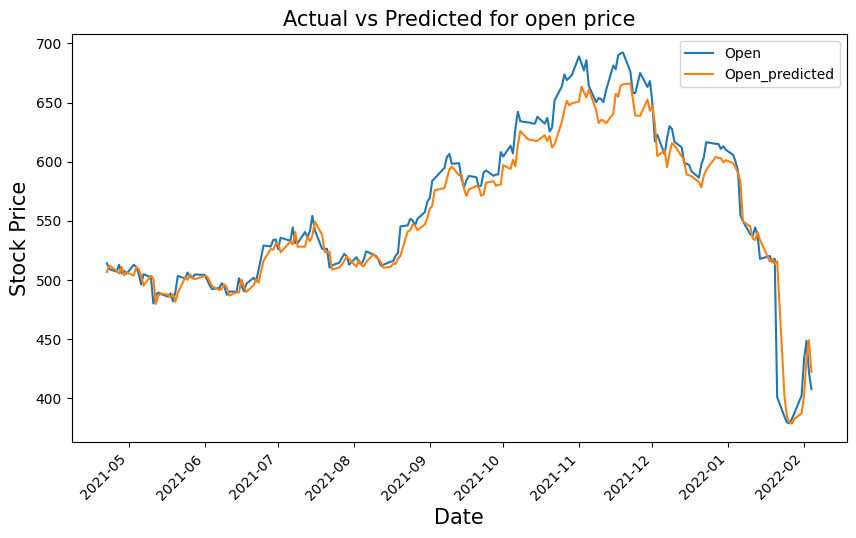

In [251]:
result[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

### A Function Which Predict Whether The Price Rise/Drop

In [338]:
def predict_price(date):
    date=pd.to_datetime(date)
    prev=date-timedelta(days=1)
    
    input_array=np.array(data.loc[:prev,:].tail(1))
    X_input=scaler.transform(input_array)
    
    #predict
    pred=lstm.predict(X_input.reshape(1,1,1))
    pred_transformed=scaler.inverse_transform(pred)
    print(input_array-pred_transformed)
    #Checking for condition based on some threshold value
    if (input_array-pred_transformed)>0:
        print("Price Will Rise")
    else:
        print("Price Will Drop")

In [337]:
predict_price('2022-01-12')

1/1 [==============================] - 0s 19ms/step
[[3.46868873]]
Price Will Rise
